In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load pre-computed evaluation data

In [7]:
data = pd.read_parquet('../data/evaluation_data.parquet')

In [8]:
data.head()

,filename,dataset_name,ocr.line,ocr.sentence,ocr.region,groundtruth.line,groundtruth.sentence,groundtruth.region,prediction.prompt,prediction.line,...,region-lev-improvement,article_id,century,File,Date,Type,NbAlignedChar,Quality Band,Overall Levenshtein Improvement,Improvement Band
0,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,Pränumeration.,Pränumeration.,Pränumeration.,Pränumeration.,Pränumeration.,Pränumeration.,Correct the spelling and grammar of the follow...,30.5 The spelling and grammar is corrected.\n30.6,...,-0.875000,None,None,None,None,None,None,99-100%,-0.875000,Negative Improvement
1,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,Pränumeration.,Pränumeration.,Pränumeration.,Pränumeration.,Pränumeration.,Pränumeration.,No text,30.5 The spelling and grammar is corrected.\n30.6,...,-0.875000,None,None,None,None,None,None,99-100%,-0.875000,Negative Improvement
2,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,Jährlich............. 8 Fr.,Jährlich.............,Jährlich............. 8 Fr.,Jährlich............. 8 Fr.,Jährlich.............,Jährlich............. 8 Fr.,Correct the spelling and grammar of the follow...,69.99 EUR 55.55 EUR 125.9,...,-0.925926,None,None,None,None,None,None,99-100%,-0.896977,Negative Improvement
3,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,Jährlich............. 8 Fr.,Jährlich.............,Jährlich............. 8 Fr.,Jährlich............. 8 Fr.,Jährlich.............,Jährlich............. 8 Fr.,No text,69.99 EUR 55.55 EUR 125.9,...,-0.925926,None,None,None,None,None,None,99-100%,-0.896977,Negative Improvement
4,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,Jährlich............. 8 Fr.,8 Fr.,Jährlich............. 8 Fr.,Jährlich............. 8 Fr.,8 Fr.,Jährlich............. 8 Fr.,Correct the spelling and grammar of the follow...,69.99 EUR 55.55 EUR 125.9,...,-0.925926,None,None,None,None,None,None,99-100%,-0.932760,Negative Improvement


## Plot 01: Compare avg. levenst. variation across models by dataset

In [19]:
def create_plot_01(df, prompt_name, training_type):

    pivot = df[(df.prompt==prompt_name) & (df.type == training_type)].pivot_table(
        values="sentence-lev-improvement",
        index='dataset_name',
        columns='model',
        aggfunc=np.mean,
        sort=True
    )
    ax = pivot.plot(kind='bar', figsize=(10, 6))
    ax.set_xlabel('')
    ax.set_ylim([-1, 1])
    ax.set_title(f'Average Lev. variation (training =  {training_type}, segment = sentence, prompt = {prompt_name})')

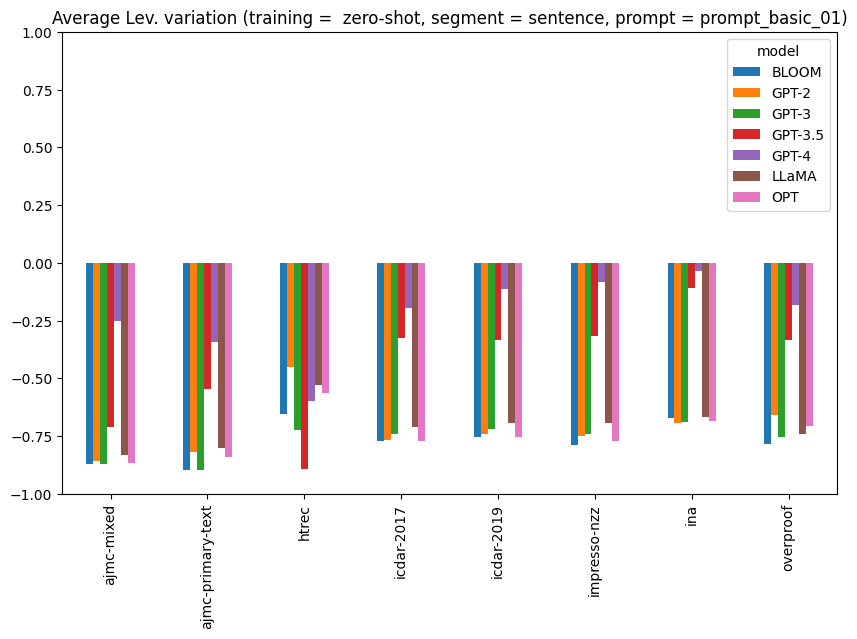

In [20]:
create_plot_01(data, prompt_name='prompt_basic_01', training_type='zero-shot')

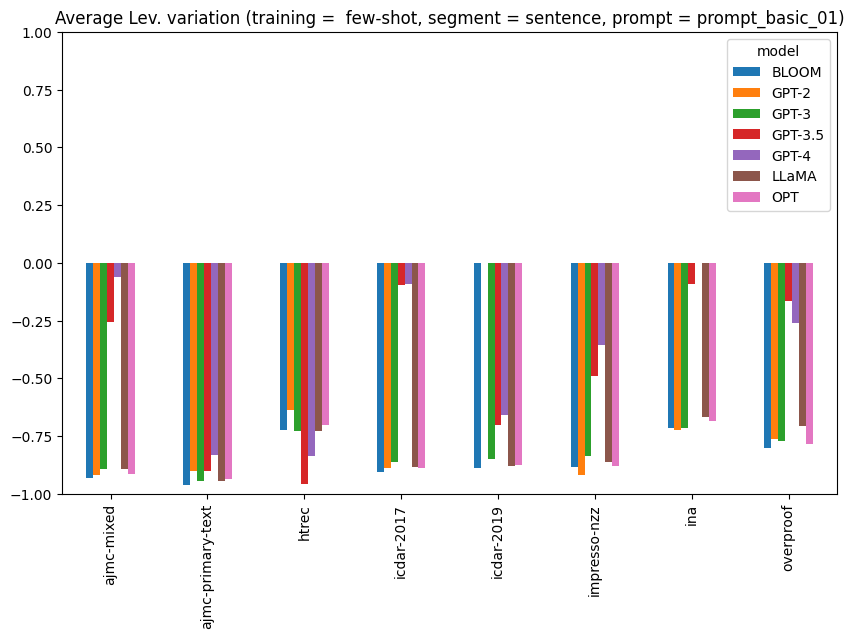

In [21]:
create_plot_01(data, prompt_name='prompt_basic_01', training_type='few-shot')

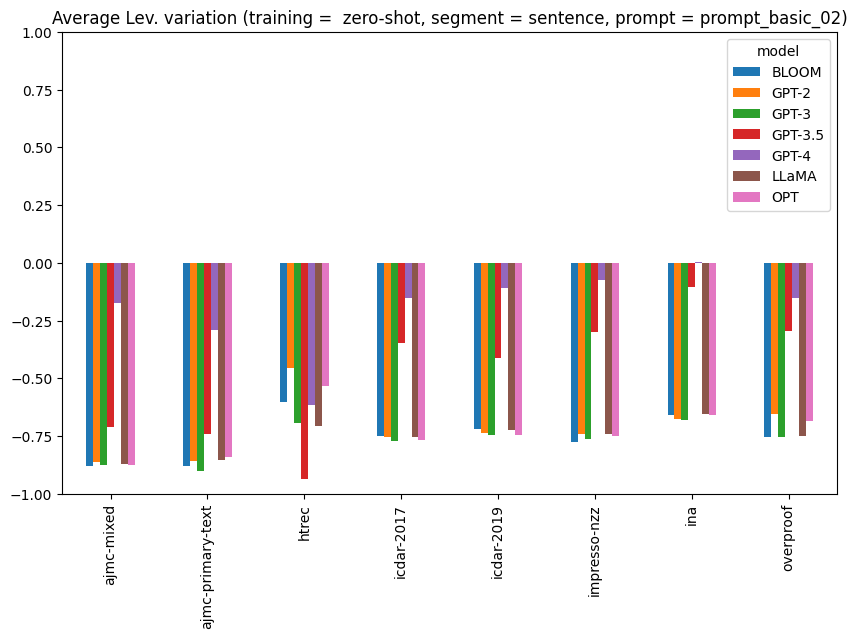

In [22]:
create_plot_01(data, prompt_name='prompt_basic_02', training_type='zero-shot')

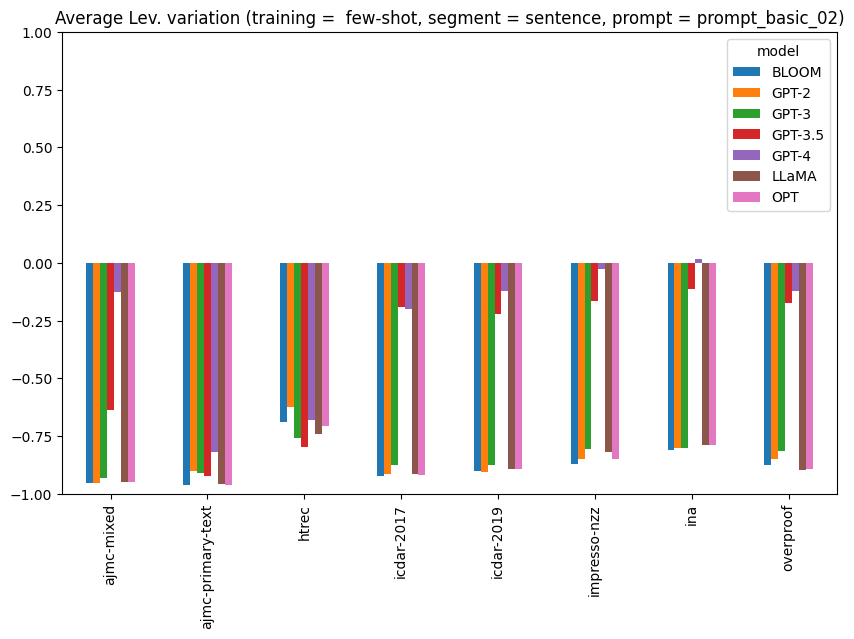

In [23]:
create_plot_01(data, prompt_name='prompt_basic_02', training_type='few-shot')

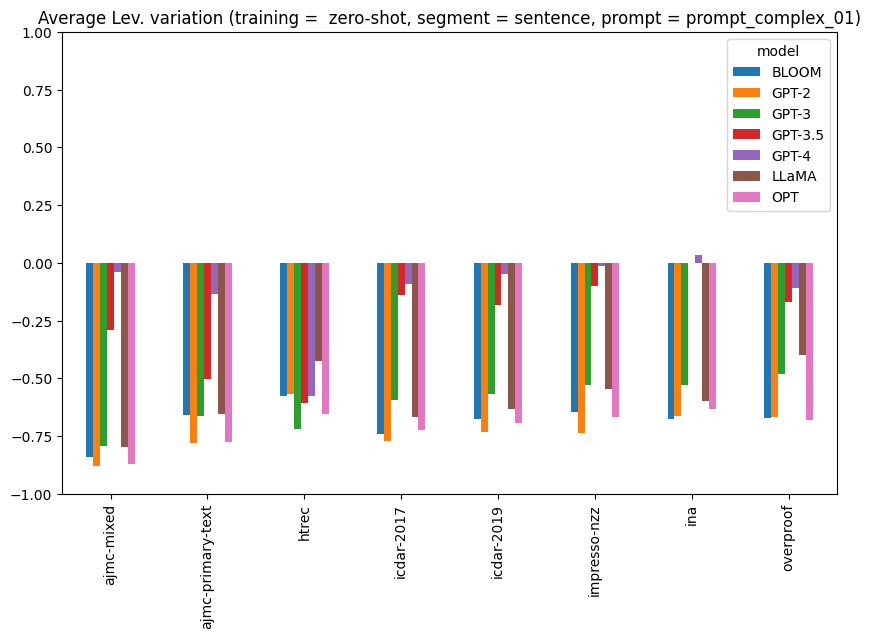

In [24]:
create_plot_01(data, prompt_name='prompt_complex_01', training_type='zero-shot')

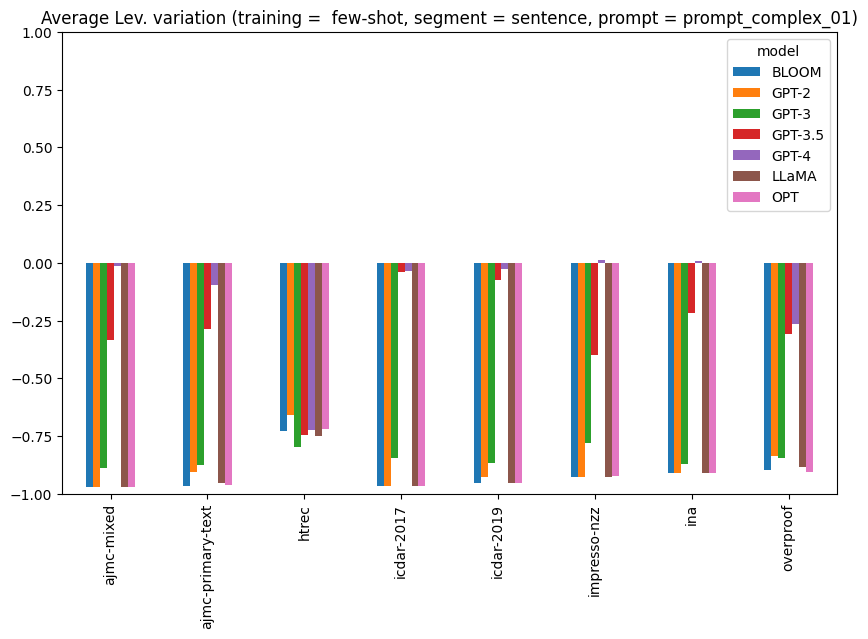

In [25]:
create_plot_01(data, prompt_name='prompt_complex_01', training_type='few-shot')

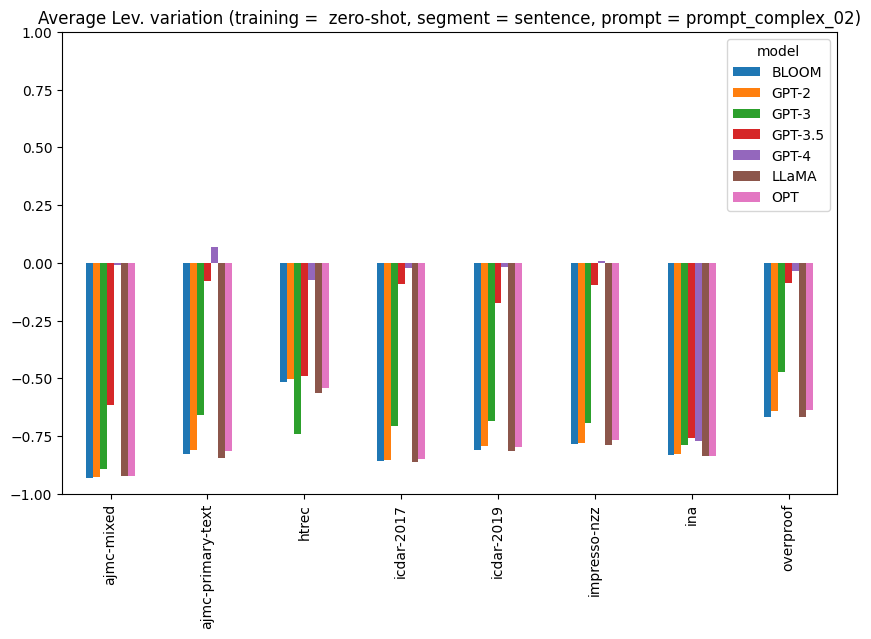

In [26]:
create_plot_01(data, prompt_name='prompt_complex_02', training_type='zero-shot')

In [28]:
# Note: experiment was not done yet
#create_plot_01(data, prompt_name='prompt_complex_02', training_type='few-shot')

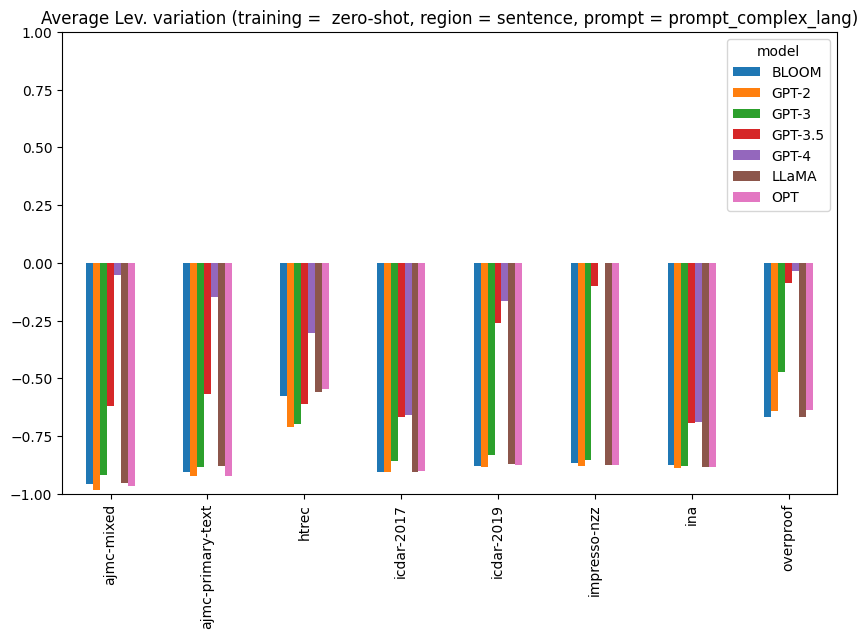

In [15]:
create_plot_01(data, prompt_name='prompt_complex_lang', training_type='zero-shot')

In [31]:
# Note: experiment was not done yet
#create_plot_01(data, prompt_name='prompt_complex_lang', training_type='few-shot')

## Plot 02: Compare avg. levenst. variation by dataset, ZS vs. FS

TODO: adapt the code below to plot only GPT-4 results, and one bar per dataset

<Figure size 1000x600 with 0 Axes>

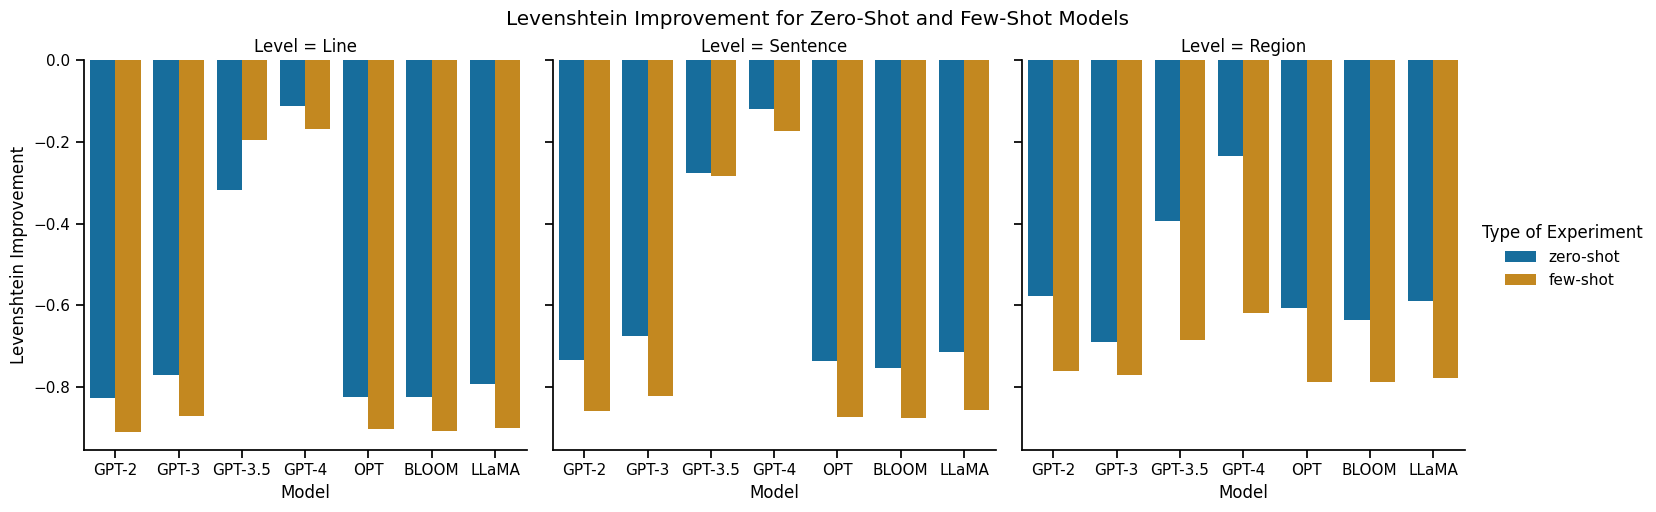

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_palette('colorblind')
sns.set_context("notebook", font_scale=1)

results = []  # Define results as a list

model_names = ['GPT-2', 'GPT-3', 'GPT-3.5', 'GPT-4', 'OPT', 'BLOOM', 'LLaMA']
level_names = ['line', 'sentence', 'region']

for type_of_experiment in ['zero-shot', 'few-shot']:
    for model in model_names:
        model_data = data[(data.model == model) & (data.type == type_of_experiment)]
        
        # Compute the mean Levenshtein Improvement across line, sentence, and region levels
        for level in level_names:
            #if level == 'line' and 'icdar' in dataset:
            #    continue

            # Append the results
            results.append({'Model': model,
                            'Type of Experiment': type_of_experiment,
                            'Level': level.capitalize(),
                            'Levenshtein Improvement': np.nanmean(model_data[f'{level}-lev-improvement'])})
# Convert the results list to a DataFrame for plotting
results_df = pd.DataFrame(results)

# Create the plot
plt.figure(figsize=(10,6))
sns.catplot(x='Model', y='Levenshtein Improvement', hue='Type of Experiment', col='Level',
            data=results_df, kind='bar', order=model_names)
plt.suptitle('Levenshtein Improvement for Zero-Shot and Few-Shot Models', y=1.02)
plt.show()


## Compile table

In [66]:
#data.info()

In [32]:
data.model.unique()

array(['LLaMA', 'GPT-3', 'BLOOM', 'OPT', 'GPT-4', 'GPT-3.5', 'GPT-2'],
      dtype=object)

### Segment = sentence

In [58]:
prompts_considered = ['prompt_basic_01', 'prompt_basic_02', 'prompt_complex_01']
df = data[(data.model=='GPT-4') & (data.prompt.isin(prompts_considered))].pivot_table(
    index=['dataset_name', 'Quality Band'],
    values='sentence-lev-improvement',
    columns=['model','type', 'prompt'],
    aggfunc=np.mean
)

In [60]:
df.round(decimals=2)

model                                    GPT-4                  \
type                                  few-shot                   
prompt                         prompt_basic_01 prompt_basic_02   
dataset_name      Quality Band                                   
ajmc-mixed        40-60%                  0.00            0.00   
                  80-99%                 -0.06           -0.13   
ajmc-primary-text 80-99%                 -0.83           -0.82   
htrec             0-40%                  -0.54            0.13   
                  40-60%                 -0.83           -0.74   
                  60-80%                 -0.83           -0.70   
                  80-99%                 -0.90           -0.75   
icdar-2017        80-99%                 -0.11           -0.24   
                  99-100%                -0.03           -0.05   
icdar-2019        60-80%                 -0.79           -0.12   
                  80-99%                 -0.52           -0.14   
                  99-100%                -0.15           -0.02   
impresso-nzz      0-40%                  -0.11           -0.03   
                  40-60%                  0.04            0.07   
                  60-80%                 -0.15            0.02   
                  80-99%                 -0.39           -0.03   
                  99-100%                -0.32           -0.05   
ina               80-99%                  0.00            0.02   
overproof         80-99%                 -0.27           -0.12   
                  99-100%                -0.12           -0.12   

model                                                             \
type                                                   zero-shot   
prompt                         prompt_complex_01 prompt_basic_01   
dataset_name      Quality Band                                     
ajmc-mixed        40-60%                    0.00           -0.25   
                  80-99%                   -0.01           -0.25   
ajmc-primary-text 80-99%                   -0.10           -0.34   
htrec             0-40%                    -0.53           -0.70   
                  40-60%                   -0.61           -0.37   
                  60-80%                   -0.76           -0.67   
                  80-99%                   -0.79           -0.64   
icdar-2017        80-99%                   -0.04           -0.21   
                  99-100%                  -0.02           -0.14   
icdar-2019        60-80%                   -0.02           -0.11   
                  80-99%                   -0.04           -0.12   
                  99-100%                   0.01           -0.13   
impresso-nzz      0-40%                     0.01           -0.08   
                  40-60%                    0.30           -0.10   
                  60-80%                    0.03           -0.06   
                  80-99%                    0.01           -0.07   
                  99-100%                  -0.01           -0.15   
ina               80-99%                    0.01           -0.04   
overproof         80-99%                   -0.28           -0.18   
                  99-100%                  -0.01           -0.21   

model                                                             
type                                                              
prompt                         prompt_basic_02 prompt_complex_01  
dataset_name      Quality Band                                    
ajmc-mixed        40-60%                 -0.25              0.00  
                  80-99%                 -0.17             -0.04  
ajmc-primary-text 80-99%                 -0.29             -0.14  
htrec             0-40%                  -0.69             -0.73  
                  40-60%                 -0.67             -0.36  
                  60-80%                 -0.58             -0.59  
                  80-99%                 -0.61             -0.68  
icdar-2017        80-99%                 -0.1

### Segment = line

In [61]:
prompts_considered = ['prompt_basic_01', 'prompt_basic_02', 'prompt_complex_01']
df = data[(data.model=='GPT-4') & (data.prompt.isin(prompts_considered))].pivot_table(
    index=['dataset_name', 'Quality Band'],
    values='line-lev-improvement',
    columns=['model','type', 'prompt'],
    aggfunc=np.mean
)
df.round(decimals=2)

model                                    GPT-4                  \
type                                  few-shot                   
prompt                         prompt_basic_01 prompt_basic_02   
dataset_name      Quality Band                                   
ajmc-mixed        40-60%                  0.00            0.00   
                  80-99%                 -0.02           -0.10   
ajmc-primary-text 80-99%                 -0.16           -0.27   
htrec             0-40%                  -0.23           -0.06   
                  40-60%                 -0.17           -0.14   
                  60-80%                 -0.29           -0.26   
                  80-99%                 -0.31           -0.30   
impresso-nzz      0-40%                   0.01           -0.22   
                  40-60%                  0.06           -0.15   
                  60-80%                 -0.01           -0.15   
                  80-99%                 -0.04           -0.38   
                  99-100%                -0.06           -0.25   
ina               80-99%                 -0.02           -0.01   
overproof         80-99%                 -0.36           -0.37   
                  99-100%                -0.35           -0.28   

model                                                             \
type                                                   zero-shot   
prompt                         prompt_complex_01 prompt_basic_01   
dataset_name      Quality Band                                     
ajmc-mixed        40-60%                   -0.03           -0.02   
                  80-99%                   -0.01           -0.22   
ajmc-primary-text 80-99%                   -0.10           -0.38   
htrec             0-40%                    -0.02           -0.74   
                  40-60%                   -0.11           -0.68   
                  60-80%                   -0.20           -0.49   
                  80-99%                   -0.21           -0.44   
impresso-nzz      0-40%                     0.00           -0.10   
                  40-60%                    0.23           -0.06   
                  60-80%                    0.01           -0.10   
                  80-99%                   -0.00           -0.10   
                  99-100%                  -0.02           -0.22   
ina               80-99%                   -0.03           -0.06   
overproof         80-99%                   -0.03           -0.21   
                  99-100%                  -0.01           -0.24   

model                                                             
type                                                              
prompt                         prompt_basic_02 prompt_complex_01  
dataset_name      Quality Band                                    
ajmc-mixed        40-60%                 -0.02             -0.02  
                  80-99%                 -0.17             -0.04  
ajmc-primary-text 80-99%                 -0.55             -0.14  
htrec             0-40%                  -0.79             -0.23  
                  40-60%                 -0.54             -0.14  
                  60-80%                 -0.47             -0.13  
                  80-99%                 -0.44             -0.10  
impresso-nzz      0-40%                  -0.08             -0.17  
                  40-60%                 -0.04              0.10  
                  60-80%                 -0.13             -0.05  
                  80-99%                 -0.09             -0.02  
                  99-100%                -0.15             -0.04  
ina               80-99%                 -0.00              0.02  
overproof         80-99%                 -0.16             -0.08  
                  99-100%                -0.18             -0.12

### Segment = region

In [64]:
prompts_considered = ['prompt_basic_01', 'prompt_basic_02', 'prompt_complex_01']
df = data[(data.model=='GPT-4') & (data.prompt.isin(prompts_considered))].pivot_table(
    index=['dataset_name', 'Quality Band'],
    values='region-lev-improvement',
    columns=['model','type', 'prompt'],
    aggfunc=np.mean
)
df.round(decimals=2)

model                                    GPT-4                  \
type                                  few-shot                   
prompt                         prompt_basic_01 prompt_basic_02   
dataset_name      Quality Band                                   
ajmc-mixed        40-60%                 -0.82           -0.86   
                  80-99%                 -0.79           -0.76   
ajmc-primary-text 80-99%                 -0.71           -0.70   
htrec             0-40%                  -0.54            0.13   
                  40-60%                 -0.83           -0.74   
                  60-80%                 -0.83           -0.70   
                  80-99%                 -0.90           -0.75   
icdar-2017        80-99%                 -0.72           -0.77   
                  99-100%                -0.72           -0.72   
icdar-2019        60-80%                 -0.58           -0.59   
                  80-99%                 -0.78           -0.28   
                  99-100%                -0.79           -0.81   
impresso-nzz      0-40%                   0.22           -0.02   
                  40-60%                 -0.26           -0.15   
                  60-80%                 -0.44           -0.15   
                  80-99%                 -0.70           -0.22   
                  99-100%                -0.51           -0.18   
ina               80-99%                 -0.81           -0.78   
overproof         80-99%                 -0.66           -0.70   
                  99-100%                -0.74           -0.80   

model                                                             \
type                                                   zero-shot   
prompt                         prompt_complex_01 prompt_basic_01   
dataset_name      Quality Band                                     
ajmc-mixed        40-60%                   -0.70           -0.14   
                  80-99%                   -0.88           -0.12   
ajmc-primary-text 80-99%                    0.02           -0.47   
htrec             0-40%                    -0.53           -0.70   
                  40-60%                   -0.61           -0.37   
                  60-80%                   -0.76           -0.67   
                  80-99%                   -0.79           -0.64   
icdar-2017        80-99%                   -0.78           -0.38   
                  99-100%                  -0.77           -0.29   
icdar-2019        60-80%                   -0.58           -0.28   
                  80-99%                   -0.44           -0.46   
                  99-100%                  -0.81           -0.67   
impresso-nzz      0-40%                     0.01           -0.07   
                  40-60%                    0.41           -0.28   
                  60-80%                   -0.14           -0.18   
                  80-99%                   -0.17           -0.10   
                  99-100%                  -0.02           -0.13   
ina               80-99%                   -0.76           -0.91   
overproof         80-99%                   -0.70           -0.32   
                  99-100%                  -0.81           -0.37   

model                                                             
type                                                              
prompt                         prompt_basic_02 prompt_complex_01  
dataset_name      Quality Band                                    
ajmc-mixed        40-60%                 -0.37             -0.26  
                  80-99%                 -0.18             -0.12  
ajmc-primary-text 80-99%                 -0.68             -0.47  
htrec             0-40%                  -0.69             -0.73  
                  40-60%                 -0.67             -0.36  
                  60-80%                 -0.58             -0.59  
                  80-99%                 -0.61             -0.68  
icdar-2017        80-99%                 -0.4